# Data Fest$^{2020}$ by ODS.ai

### Bulat Useinov
 > @bulatuseinov




***
# What is OCR?
***

<center>
    <img src='https://miro.medium.com/max/737/1*FCjWFJVYOl1phvmWKJCO2w.png'>
</center>

### **OCR** - Optical Character Recognition


### History
1. Telegraph
2. Emanuel Goldberg 1920s
    - On the eve of the First World War, physicist Emanuel Goldberg invented a machine that could read characters and convert them into telegraph code. In the 1920s, he went a step further and created the first electronic document retrieval system.
    - Problems:
        - Only one font at time, telegraph code, needs operator...
3. Omni-font OCR 1970s
    - Inventor Ray Kurzweil commercialised “omni-font OCR”, which could process text printed in almost any font.
4. Cloud-based service, Full Automatic OCR
5. Future

### Pipeline
1. Image
2. Image Preprocessing
    - Grayscaling
    - Binarization
    - Thresholding
    - ...
3. Line Detection / Text segmentation
4. Words / Char Detection
5. Char Classification 
6. Text output
7. Text Postprocessing (Language modelling)

***
# Frameworks for OCR and Image processing
***



<center>
    <img src='https://pics.me.me/loki-is-only-attracted-to-tesseract-58783854.png'>
</center>

## [Tesseract-OCR](https://opensource.google/projects/tesseract)

Developed by HP later by Google (Open-source)

### How Tesseract works?
<center>
    <img src='https://miro.medium.com/max/1820/0*cEbtO8i2oo97Hitt.png'>
</center>

<center>
    <img src='https://miro.medium.com/max/2912/1*YlauFagxXNaGqxSVwBzuoA.png'>
</center>

## [OpenCV](https://opencv.org)

Open-source library with variety of Computer Vision algorithms

***
# Imports
***

In [ ]:
!sudo apt install tesseract-ocr
!sudo apt install tesseract-ocr-rus
!pip install pytesseract

In [ ]:
# DATASCIENCE!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# main imports
import cv2
import pytesseract as ts
import re

# utils
from zipfile import ZipFile
from google.colab.patches import cv2_imshow
import imutils
import os
from glob import glob
from tqdm import tqdm

***
# Image Preprocessing
***

In [ ]:
"""
Lets define some utils functions
"""

def show_image(image):
    """
    Shows image
    Parameters:
    - image
    """
    plt.figure(figsize=(10,10))
    plt.imshow(image)
    plt.show()


def show_images(before, after, gray=True):
    """
    Shows two images: before and after some preprocessing
    Parameters:
    - before (image)
    - after (image)
    - gray: bool
    """
    fig = plt.figure(figsize=(20,10))
    ax = []
    titles = ['BEFORE', 'AFTER']
    imgs = [before, after]
    for i, title in enumerate(titles):
        ax.append(fig.add_subplot(1, 2, i+1))
        ax[-1].set_title(title, fontsize=15)
        if i > 0 and gray:
            plt.imshow(imgs[i], cmap='gray')
        else:
            plt.imshow(cv2.cvtColor(imgs[i], cv2.COLOR_BGR2RGB))
    plt.show()

### Before we start let's figure out how to work with Tesseract 

In [ ]:
!tesseract --help-extra

Usage:
  tesseract --help | --help-extra | --help-psm | --help-oem | --version
  tesseract --list-langs [--tessdata-dir PATH]
  tesseract --print-parameters [options...] [configfile...]
  tesseract imagename|imagelist|stdin outputbase|stdout [options...] [configfile...]

OCR options:
  --tessdata-dir PATH   Specify the location of tessdata path.
  --user-words PATH     Specify the location of user words file.
  --user-patterns PATH  Specify the location of user patterns file.
  -l LANG[+LANG]        Specify language(s) used for OCR.
  -c VAR=VALUE          Set value for config variables.
                        Multiple -c arguments are allowed.
  --psm NUM             Specify page segmentation mode.
  --oem NUM             Specify OCR Engine mode.
NOTE: These options must occur before any configfile.

Page segmentation modes:
  0    Orientation and script detection (OSD) only.
  1    Automatic page segmentation with OSD.
  2    Automatic page segmentation, but no OSD, or OCR.
  3    F

In [ ]:
!wget https://www.dropbox.com/s/f8gm7581akoy6dn/tess_ex.jpg
!wget https://www.dropbox.com/s/a75lgjkotdc7jns/tess_ex_rot.jpg

tess_ex = cv2.imread('/content/tess_ex.jpg')
tess_ex_rot = cv2.imread('/content/tess_ex_rot.jpg')

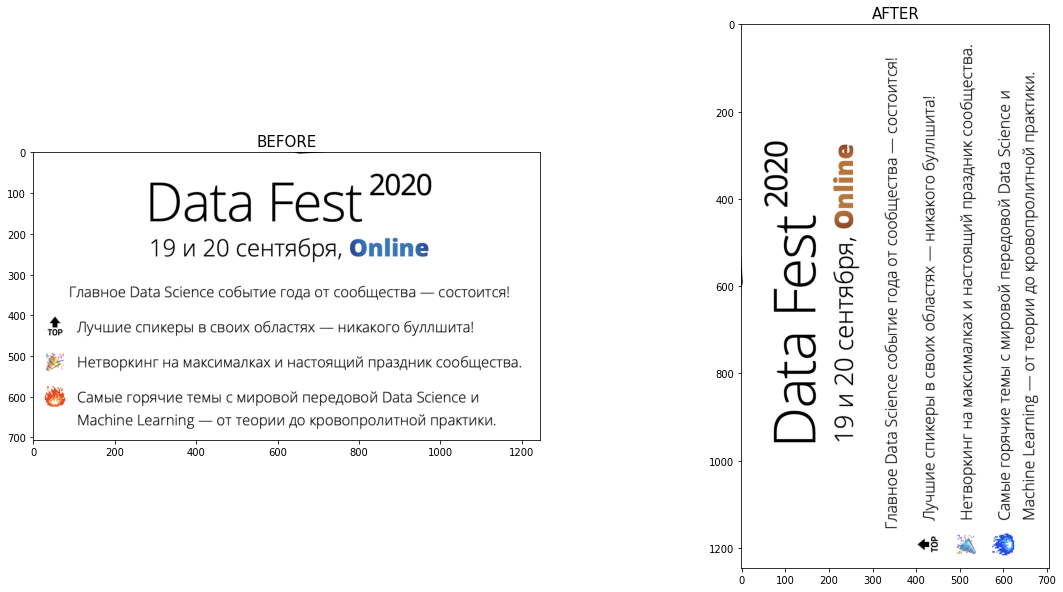

In [ ]:
show_images(tess_ex, tess_ex_rot)

In [ ]:
print(ts.image_to_string(tess_ex))

Data Fest*””

19 u 20 ceHTA6pa, Online

[naBHoe Data Science co6biTue rofia OT COO6LLECTBa — COCTOUTCA!
+ Jlyuluve CnuKepbl B CBOUX OOMacTAX — HUKakoro bysNLuUTa!
& HeTBOPKUHT Ha MaKCUMasiKax VU HaCTOALyM npa3sQHUk COOSLIeCTBa.

i Camble ropsune TeMbI C MMpoBoN NepesoBoN Data Science u
Machine Learning — oT Teopuv go KPOBONpoONUTHON npaktTuKku.



In [ ]:
config = '-l rus+eng'

print(ts.image_to_string(tess_ex, config=config))

Data Fest*””

19 u 20 ceHTA6pa, Online

[naBHoe Data Science co6biTue rofia от сообщества — состоится!
+ Лучшие спикеры в своих областях — никакого буллшита!
№ Нетворкинг на максималках и настоящий праздник сообщества.

4% Самые горячие темы с мировой передовой Data Science u
Machine Геагптя — от теории до кровопролитной практики.



In [ ]:
print(ts.image_to_osd(tess_ex_rot))

Page number: 0
Orientation in degrees: 270
Rotate: 90
Orientation confidence: 17.31
Script: Latin
Script confidence: 2.08



In [ ]:
d = ts.image_to_data(tess_ex, config=config, output_type=ts.Output.DICT)

In [ ]:
d['text'][5], d['conf'][5]

('Fest*””', 21)

In [ ]:
d['text'][31], d['conf'][31]

('своих', 96)

In [ ]:
b = ts.image_to_boxes(tess_ex)

In [ ]:
b

'D 288 536 336 631 0\na 336 536 360 631 0\nt 394 535 425 608 0\na 453 535 534 624 0\nF 587 536 622 631 0\ne 644 535 686 608 0\ns 712 535 744 608 0\nt 767 535 807 624 0\n* 827 600 861 653 0\n” 865 599 896 653 0\n” 904 599 977 653 0\n1 290 450 305 492 0\n9 321 449 348 493 0\nu 371 450 396 481 0\n2 419 450 439 493 0\n0 452 449 479 493 0\nc 500 449 523 482 0\ne 528 449 554 482 0\nH 562 450 583 481 0\nT 593 450 611 481 0\nA 619 450 640 481 0\n6 652 449 668 495 0\np 668 449 679 495 0\na 699 436 714 482 0\n, 722 442 756 481 0\nO 778 449 810 493 0\nn 810 449 818 493 0\nl 838 450 856 483 0\ni 866 450 895 496 0\nn 901 450 926 483 0\ne 938 450 970 483 0\n[ 91 350 105 376 0\nn 106 350 119 370 0\na 126 350 139 370 0\nB 147 350 160 370 0\nH 160 350 163 370 0\no 176 350 184 370 0\ne 191 350 219 370 0\nD 240 350 246 376 0\na 246 350 260 376 0\nt 264 350 278 370 0\na 282 350 310 374 0\nS 324 350 334 377 0\nc 334 350 340 377 0\ni 348 350 364 376 0\ne 369 350 385 370 0\nn 390 350 402 370 0\nc 402 350 406

In [ ]:
"""
Some visualization functions
"""

def image_to_word_boxes(image, config):
    """
    Returns image with boxes given by Tesseract word detection
    Parameters:
    - image
    - config (for Tesseract)
    """
    d = ts.image_to_data(image, config=config, output_type=ts.Output.DICT)
    n_boxes = len(d['text'])
    for i in range(n_boxes):
        if int(d['conf'][i]) > 50:
            (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
            image = cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    return image


def image_to_char_boxes(image, config):
    """
    Returns image with boxes given by Tesseract character detection
    Parameters:
    - image
    - config (for Tesseract)
    """
    h, w, c = image.shape
    boxes = ts.image_to_boxes(image, config=config) 
    for b in boxes.splitlines():
        b = b.split(' ')
        image = cv2.rectangle(image, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)
    return image


In [ ]:
config = '-l rus+eng'

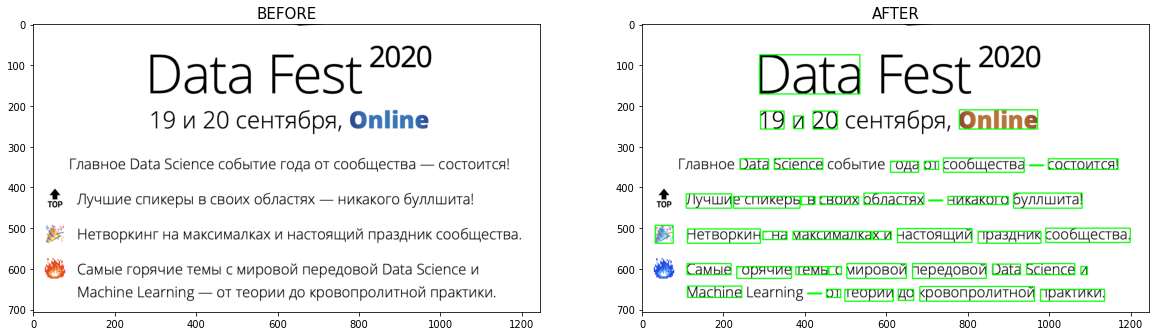

In [ ]:
show_images(ex, image_to_word_boxes(ex.copy(), config))

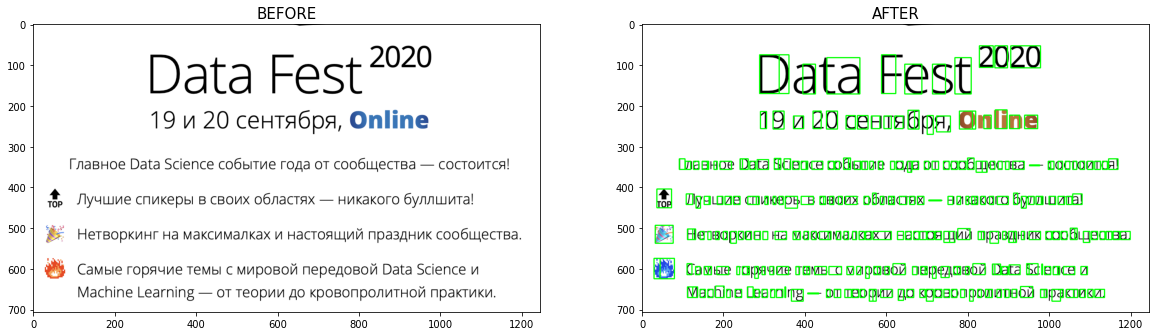

In [ ]:
show_images(ex, image_to_char_boxes(ex.copy(), config))

## Main preprocessing functions

In [ ]:
"""
Preprocessing methods
"""

# upscaling
def upscale(image, n=3):
    """
    Returns upscaled image
    Parameters:
    - image
    - n (times scaling)
    """
    return cv2.resize(image, None, fx=n, fy=n, interpolation=cv2.INTER_CUBIC)


# grayscaling
def grayscale(image):
    """
    Returns image in shades of gray
    Parameters:
    - image
    """
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# denoising
def remove_noise(image, method='median'):
    """
    Removes noise with Blur
    Options:
    - Median Blur (median)
    - Gaussian Blur (gaussian)
    Parameters:
    - image
    - method
    """
    if method == 'median':
        return cv2.medianBlur(image, 35)
    elif method == 'gaussian':
        return cv2.GaussianBlur(image, (35,35), 0)
    else:
        raise 'Please specify type of blurring (median, gaussian)'

 # thresholding
def thresholding(image, method='otsu'):
    """
    Image binarization / Image thresholding
    Options:
    - Simple Binary Thresholding (single)
    - Adaptive Thresholding (adaptive)
    - Otsu Thresholding (otsu)
    Comment: There is no SOTA thresholding method, it depends on different cases
    Parameters:
    - image
    - method
    """
    if method == 'simple':
        return cv2.threshold(image, 100, 255, cv2.THRESH_BINARY)[1]

    elif method == 'adaptive':
        return cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 95, 4)
        
    elif method == 'otsu':
        return cv2.threshold(image, 100, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

    else:
        raise 'Please specify type of thresholding (simple, adaptive, otsu)'

# dilation
def dilate(image):
    """
    Returns Image with applied dilation
    Parameters:
    - image
    """
    kernel = np.ones((5,5))
    return cv2.dilate(image, kernel, iterations = 1)
    
# erosion
def erode(image):
    """
    Returns Image with applied erosion
    Parameters:
    - image
    """
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

# opening
def opening(image):
    """
    Returns Image with applied dilation after erosion
    Parameters:
    - image
    """
    kernel = np.ones((3,3))
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

# canny edge detection
def canny(image):
    """
    Returns Image with canny edge detection
    Parameters:
    - image
    """
    return cv2.Canny(image, 100, 200)

# skew correction
def deskew(image):
    """
    Returns Image with applied skew correction
    Parameters:
    - image
    """
    image = (255 - image)
    contours, hierarchy = cv2.findContours(image, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key = cv2.contourArea, reverse = True)

    # Find largest contour and surround in min area box
    largestContour = contours[0]
    minAreaRect = cv2.minAreaRect(largestContour)

    # Determine the angle
    angle = minAreaRect[-1]
    if angle < -45:
        angle = 90 + angle

    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    rotated = (255 - rotated)

    return rotated

# custom preprocessing
def custom_preprocess(image):
    """
    Returns Image after custom preprocessing
    Parameters:
    - image
    """

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

    
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2,2))
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)

    
    cnts = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    for c in cnts:
        area = cv2.contourArea(c)
        if area < 50:
            cv2.drawContours(opening, [c], -1, 0, -1)

    
    result = 255 - opening
    result = cv2.GaussianBlur(result, (3,3), 0)
    return result


## Download some examples for preprocessing

In [ ]:
!wget https://www.dropbox.com/s/70dt9fgsx76xw35/denoise_ex.jpg
!wget https://www.dropbox.com/s/lqbfm684pvd8zw0/threshold_ex.jpg
!wget https://www.dropbox.com/s/xsx87zer17yjai9/preprocess_ex.jpg
!wget https://www.dropbox.com/s/86xctm73wuja1pa/deskew_ex.jpg

denoise_ex = cv2.imread('/content/denoise_ex.jpg')
threshold_ex = cv2.imread('/content/threshold_ex.jpg')
preprocess_ex = cv2.imread('/content/preprocess_ex.jpg')
deskew_ex = cv2.imread('/content/deskew_ex.jpg')

## Grayscale and Denoising

In [ ]:
denoise_ex = upscale(denoise_ex)

### Median

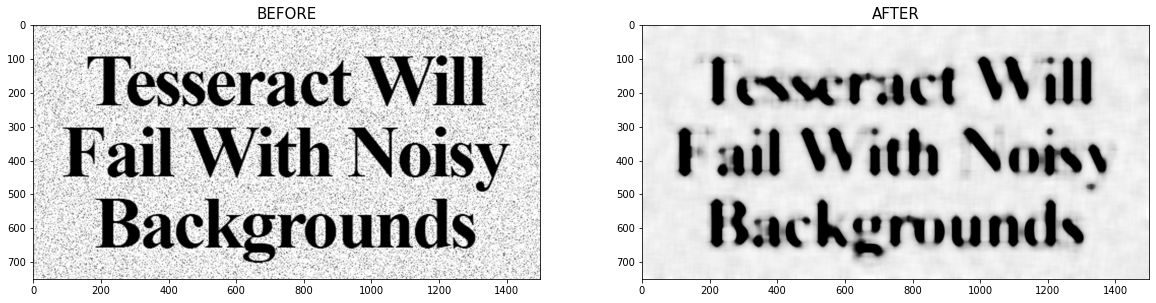

In [ ]:
show_images(denoise_ex, remove_noise(denoise_ex, method='median'))

### Gaussian

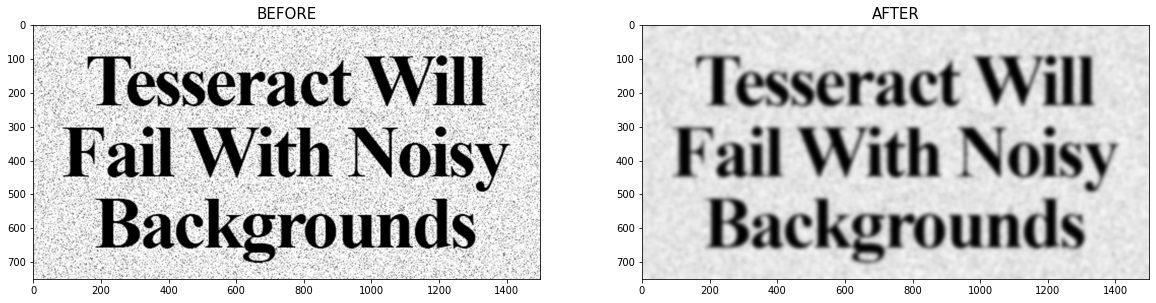

In [ ]:
show_images(denoise_ex, remove_noise(denoise_ex, method='gaussian'))

### OCR Example

In [ ]:
print(ts.image_to_string(denoise_ex))

 

Fail With i Noisy
Bad c rounds —



In [ ]:
print(ts.image_to_string(remove_noise(denoise_ex, method='gaussian')))

Tesseract Will
Fail With Noisy
Backgrounds



## Threshholding

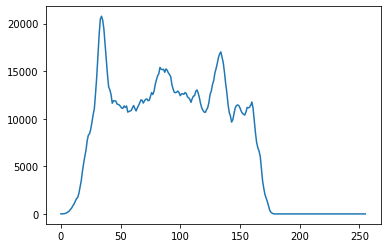

In [ ]:
histr = cv2.calcHist([grayscale(threshold_ex)],[0],None,[256],[0,256])
plt.plot(histr);

### Simple

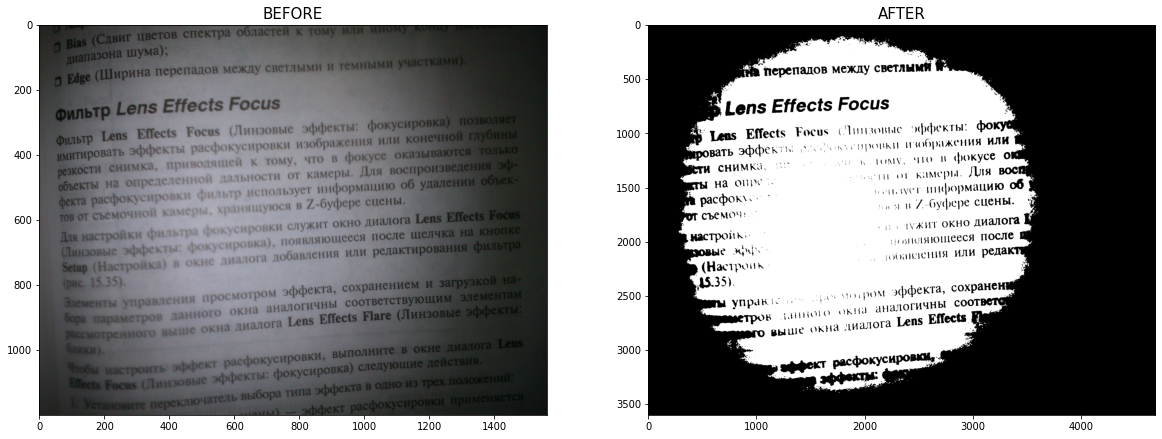

In [ ]:
show_images(threshold_ex, thresholding(upscale(grayscale(threshold_ex)), method='simple'))

### Adaptive

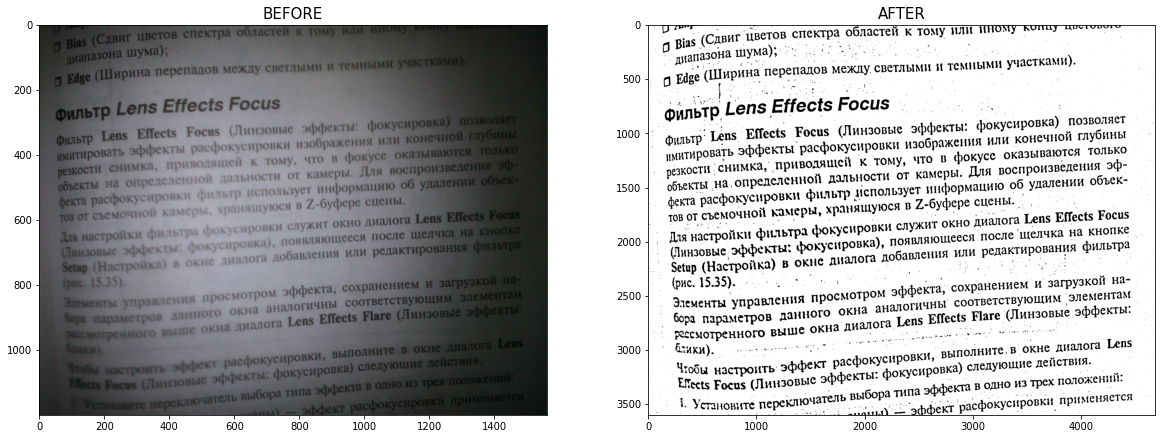

In [ ]:
show_images(threshold_ex, thresholding(upscale(grayscale(threshold_ex)), method='adaptive'))

### OTSU

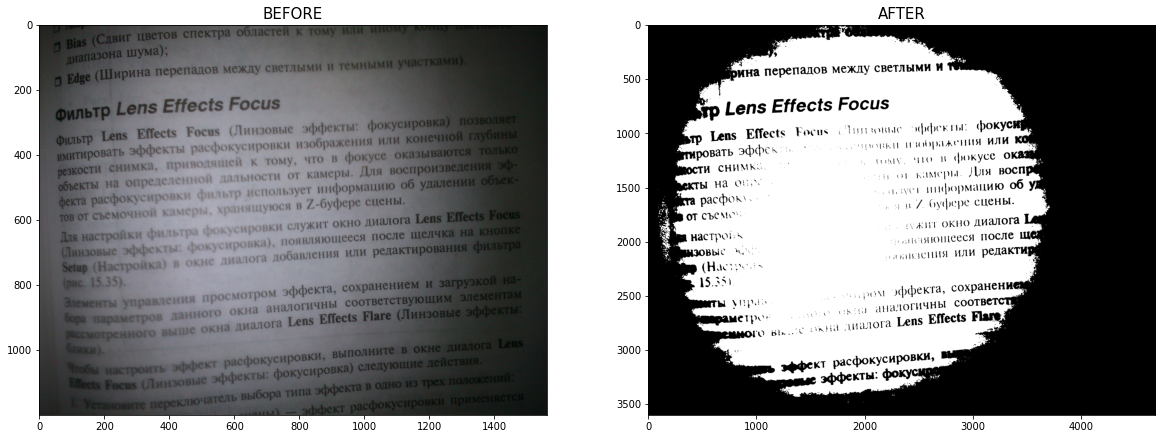

In [ ]:
show_images(threshold_ex, thresholding(upscale(grayscale(threshold_ex)), method='otsu'))

## Custom Preprocessing

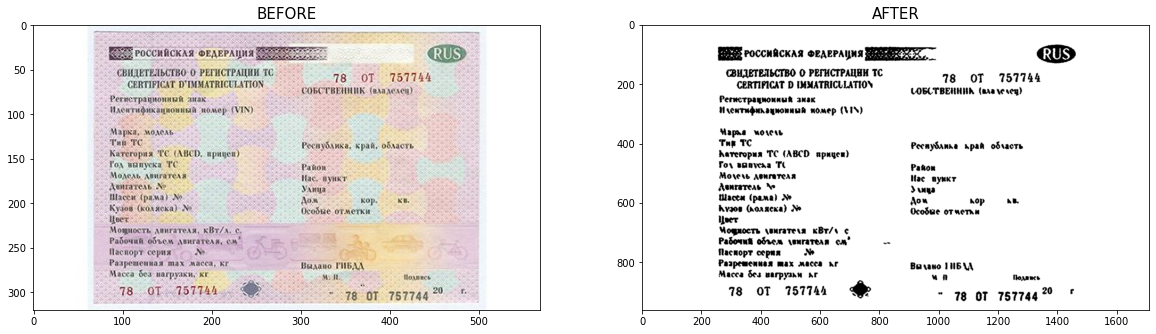

In [ ]:
show_images(preprocess_ex, custom_preprocess(upscale(preprocess_ex)))

## Deskewing

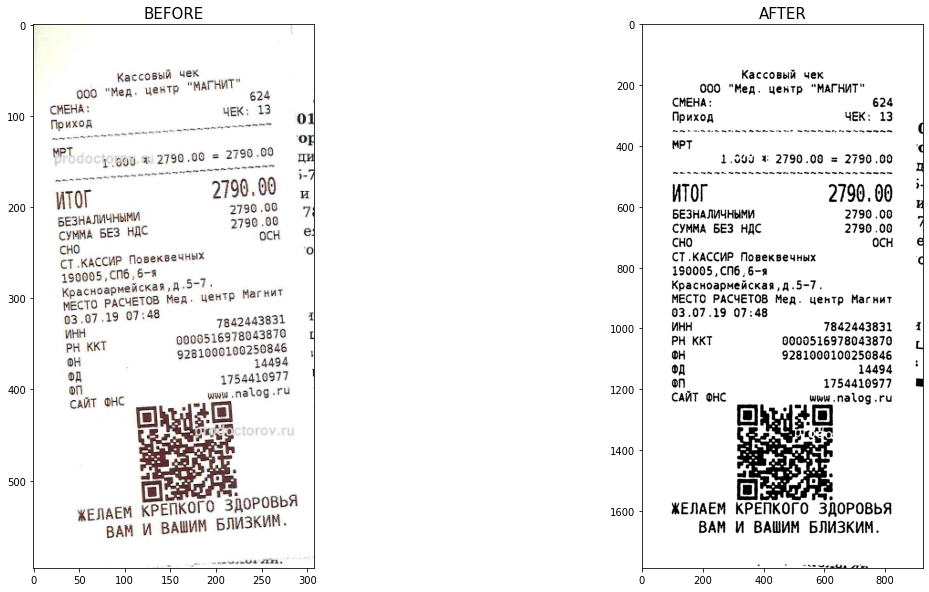

In [ ]:
show_images(deskew_ex, deskew(thresholding(grayscale(upscale(deskew_ex)))))

***
# OCR
***

## Dataset Overview

In [ ]:
!wget https://www.dropbox.com/s/zo0nil5egkd3dut/receipts_for_ocr.zip

with ZipFile('/content/receipts_for_ocr.zip', 'r') as zipObj:
    zipObj.extractall('/content/')

In [ ]:
receipts_paths_full = glob("/content/receipts_for_ocr/*.jpg")
receipts_paths = receipts_paths_full[:30]

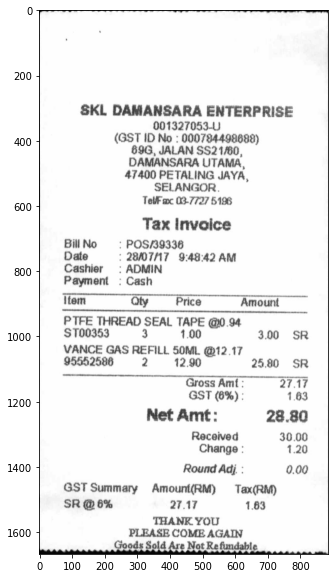

In [ ]:
show_image(cv2.imread(receipts_paths[10]))

In [ ]:
print(ts.image_to_string(cv2.imread(receipts_paths[10])))

NameError: ignored

## Applying OCR

In [ ]:
def val_or_none(value: list):
    """
    Returns max-value if list not empty, else None
    """
    if value:
        return max(value)
    else:
        return None

In [ ]:
total_re = "[T|t][O|o|0][T|t][A|a][L|l]\D+([0-9]+[\.][0-9]+)"
cash_re = "[C|c][A|a][S|s][H|h]\D+([0-9]+[\.][0-9]+)"
change_re = "[C|c][H|h][A|a][N|n][G|g][E|e]\D+([0-9]+[\.][0-9]+)"

receipt_list = []
total_list = []
cash_list = []
change_list = []

for receipt_path in tqdm(receipts_paths):
    receipt = cv2.imread(receipt_path)
    text = ts.image_to_string(receipt)

    total = val_or_none([float(x) for x in re.findall(total_re, text)])
    cash = val_or_none([float(x) for x in re.findall(cash_re, text)])
    change = val_or_none([float(x) for x in re.findall(change_re, text)])

    receipt_list.append(receipt_path)
    total_list.append(total)
    cash_list.append(cash)
    change_list.append(change)


100%|██████████| 30/30 [01:27<00:00,  2.93s/it]


## Getting parsed data

In [ ]:
df = pd.DataFrame()
df['Receipt_path'] = receipt_list
df['Total'] = total_list
df['Cash'] = cash_list
df['Change'] = change_list
df

Receipt_path   Total    Cash  Change
0   /content/receipts_for_ocr/X51008042781.jpg    1.90     NaN     NaN
1   /content/receipts_for_ocr/X51008030561.jpg   17.60     NaN     NaN
2   /content/receipts_for_ocr/X51006329183.jpg    6.50     NaN     NaN
3   /content/receipts_for_ocr/X00016469670.jpg  193.00  193.00     NaN
4   /content/receipts_for_ocr/X51005741929.jpg    5.50   94.50     NaN
5   /content/receipts_for_ocr/X51006619704.jpg     NaN     NaN     NaN
6   /content/receipts_for_ocr/X51005568890.jpg    5.00    5.00     NaN
7   /content/receipts_for_ocr/X51007846403.jpg   13.70     NaN     2.0
8   /content/receipts_for_ocr/X51006008081.jpg  226.60     NaN     NaN
9   /content/receipts_for_ocr/X51006556654.jpg   16.34     NaN     NaN
10  /content/receipts_for_ocr/X51006857126.jpg     NaN    0.94     1.2
11  /content/receipts_for_ocr/X51006556728.jpg   39.40     NaN     NaN
12  /content/receipts_for_ocr/X51007846304.jpg    7.52    7.50     0.0
13  /content/receipts_for_ocr/X51005719905.jpg    8.20    8.20     0.0
14  /content/receipts_for_ocr/X51006334927.jpg    6.04   50.00    43.6
15  /content/receipts_for_ocr/X51005663307.jpg   56.80  100.00    43.2
16  /content/receipts_for_ocr/X51005719863.jpg     NaN     NaN     NaN
17  /content/receipts_for_ocr/X51005724628.jpg   84.80   84.80     0.0
18  /content/receipts_for_ocr/X51008042779.jpg    7.60    7.60     NaN
19  /content/receipts_for_ocr/X51006389898.jpg     NaN     NaN     NaN
20  /content/receipts_for_ocr/X51009453729.jpg   79.50     NaN    20.5
21  /content/receipts_for_ocr/X51005442375.jpg    8.50    8.50     0.0
22  /content/receipts_for_ocr/X51008099100.jpg   46.89   56.90    10.0
23  /content/receipts_for_ocr/X51005724552.jpg   68.90   68.90     0.0
24  /content/receipts_for_ocr/X51005745298.jpg    3.99   10.00     6.0
25  /content/receipts_for_ocr/X51006008082.jpg  204.20     NaN     0.0
26  /content/receipts_for_ocr/X51006619567.jpg     NaN  676.00     0.0
27  /content/receipts_for_ocr/X51006008090.jpg     NaN     NaN     NaN
28  /content/receipts_for_ocr/X51005337877.jpg   53.00     NaN     NaN
29  /content/receipts_for_ocr/X51005677336.jpg   21.00   22.26     0.0

<center>
    <img src='https://indico.io/wp-content/uploads/2016/02/inception_meme.jpg'>
</center>